<a href="https://colab.research.google.com/github/Marcellinus08/Deep-Learning/blob/main/uts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LIBRARY YANG DIBUTUHKAN

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


LOAD DATA & PEMBERSIHAN DATA

In [52]:
df = pd.read_csv('RegresiUTSTelkom.csv')

# === 2. Pisahkan Fitur dan Target ===
target_column = df.columns[0]
X = df.drop(columns=[target_column])
y = df[target_column]

In [53]:
df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-null  float64
 19  32

Imputasi Data Hilang pada Fitur

In [55]:
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

Hapus baris target yang NaN

In [56]:
valid_target_mask = ~y.isna()
X_clean = X_imputed[valid_target_mask]
y_clean = y[valid_target_mask]


Normalisasi

In [57]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

Split Train/Test

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_clean, test_size=0.2, random_state=42
)

Buat Model

In [59]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1)  # Output 1 neuron untuk regresi
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Early Stopping

In [60]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Training

In [61]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 657153.7500 - mae: 549.5016 - val_loss: 2538.5239 - val_mae: 36.9962
Epoch 2/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 26949.3203 - mae: 130.3326 - val_loss: 658.9906 - val_mae: 18.2244
Epoch 3/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 19926.0469 - mae: 112.5233 - val_loss: 474.3564 - val_mae: 17.0760
Epoch 4/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 12230.7764 - mae: 87.7806 - val_loss: 210.5512 - val_mae: 11.4703
Epoch 5/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - loss: 3687.5945 - mae: 47.0697 - val_loss: 100.4427 - val_mae: 7.8729
Epoch 6/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 142.2359 - mae: 9.0067 - val_loss: 93.8535 - val_mae: 7.3880
Epoch 7/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - loss: 102.9447 - mae: 7.4715 - val_loss: 87.6814 - val_mae: 6.5627
Epoch 8/100
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 96.6279 - mae: 7.

Prediksi dan Evaluasi

In [62]:
y_pred = model.predict(X_test).flatten()


3221/3221 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


Bersihkan NaN dari prediksi dan target


In [63]:
mask = ~np.isnan(y_test) & ~np.isnan(y_pred)
y_test_clean = y_test[mask]
y_pred_clean = y_pred[mask]


 Evaluation

In [64]:
mse = mean_squared_error(y_test_clean, y_pred_clean)
mae = mean_absolute_error(y_test_clean, y_pred_clean)
r2 = r2_score(y_test_clean, y_pred_clean)

print("\n=== Evaluasi Regresi (Setelah Optimasi) ===")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")



=== Evaluasi Regresi (Setelah Optimasi) ===
Mean Squared Error (MSE): 80.5730
Mean Absolute Error (MAE): 6.2835
R² Score: 0.3211


Visualisasi

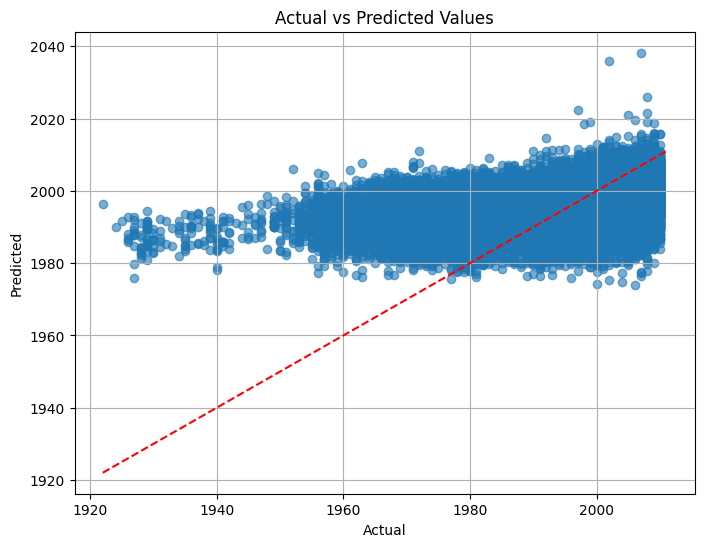

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

Visualisasi

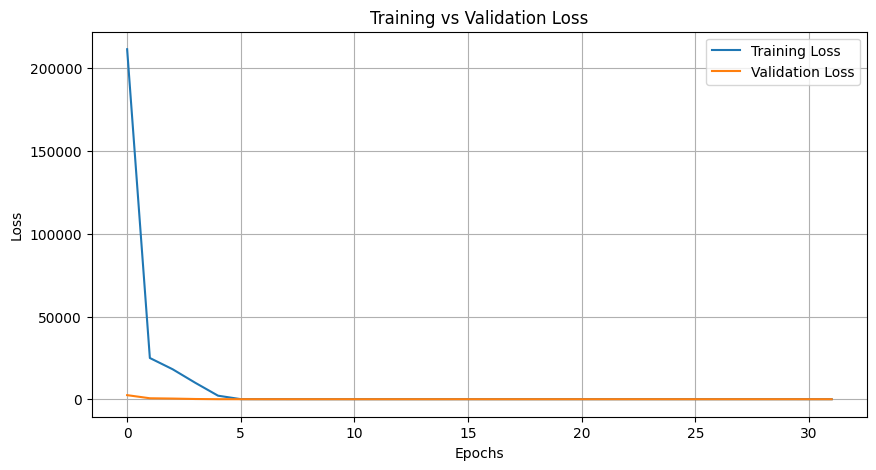

In [67]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()